Classify animals into dog and cat category based of given features 
- Plays Fetch Game
- Grumpy in nature
- Favorite food


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from io import StringIO
dataset =StringIO('''
    Training instance,Plays fetch,Is grumpy,Favorite food,Species
    1,Yes,No,Bacon,Dog
    2,No,Yes,Dog Food,Dog
    3,No,Yes,Cat food,Cat
    4,No,Yes,Bacon,Cat
    5,No,No,Cat food,Cat
    6,No,Yes,Bacon,Cat
    7,No,Yes,Cat Food,Cat
    8,No,No,Dog Food,Dog
    9,No,Yes,Cat food,Cat
    10,Yes,No,Dog Food,Dog
    11,Yes,No,Bacon,Dog
    12,No,No,Cat food,Cat
    13,Yes,Yes,Cat food,Cat
    14,Yes,Yes,Bacon,Dog
''')
df = pd.read_csv(dataset)
df

,Training instance,Plays fetch,Is grumpy,Favorite food,Species
0,1,Yes,No,Bacon,Dog
1,2,No,Yes,Dog Food,Dog
2,3,No,Yes,Cat food,Cat
3,4,No,Yes,Bacon,Cat
4,5,No,No,Cat food,Cat
5,6,No,Yes,Bacon,Cat
6,7,No,Yes,Cat Food,Cat
7,8,No,No,Dog Food,Dog
8,9,No,Yes,Cat food,Cat
9,10,Yes,No,Dog Food,Dog


In [4]:
decisiontree = RandomForestClassifier(criterion='entropy', n_estimators=2, max_depth=2)
df["Plays fetch"] = [each == "Yes" for each in df["Plays fetch"]]
df["Is grumpy"] = [each == "Yes" for each in df["Is grumpy"]]
df["Favorite food"] = [(0 if (food == "Bacon") else 1 if (food == "Dog Food") else 2 ) for food in df["Favorite food"]]
df

,Training instance,Plays fetch,Is grumpy,Favorite food,Species
0,1,True,False,0,Dog
1,2,False,True,1,Dog
2,3,False,True,2,Cat
3,4,False,True,0,Cat
4,5,False,False,2,Cat
5,6,False,True,0,Cat
6,7,False,True,2,Cat
7,8,False,False,1,Dog
8,9,False,True,2,Cat
9,10,True,False,1,Dog


In [5]:
obtained_tree = decisiontree.fit(df[["Plays fetch","Is grumpy","Favorite food"]], df['Species'])

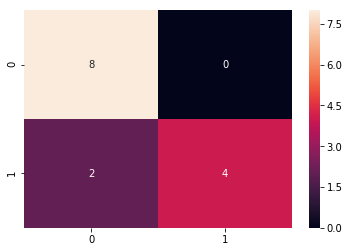

In [6]:
import seaborn
Predicted_Y = obtained_tree.predict(df[["Plays fetch","Is grumpy","Favorite food"]])
seaborn.heatmap(confusion_matrix(df['Species'], Predicted_Y), annot=True)

In [7]:
print(classification_report(df['Species'], Predicted_Y))

             precision    recall  f1-score   support

        Cat       0.80      1.00      0.89         8
        Dog       1.00      0.67      0.80         6

avg / total       0.89      0.86      0.85        14



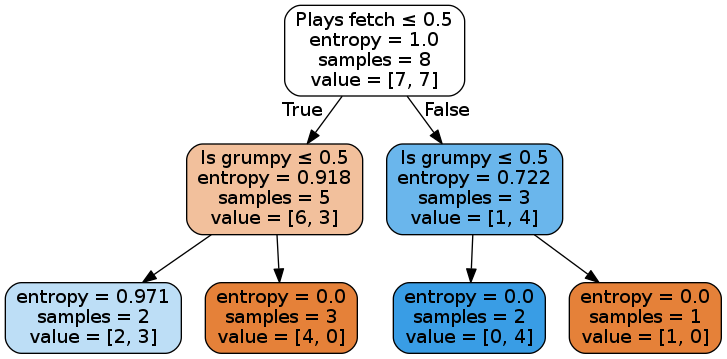

In [8]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

ForestTree1 = StringIO()
# export_graphviz(obtained_tree, out_file=DecisionTree, feature_names=["Plays fetch","Is grumpy","Favorite food"])

export_graphviz(obtained_tree.estimators_[0], out_file=ForestTree1,  
                filled=True, rounded=True, feature_names=["Plays fetch","Is grumpy","Favorite food"],
                special_characters=True)

graph1 = pydotplus.graph_from_dot_data(ForestTree1.getvalue())  
I1= Image(graph1.create_png())

ForestTree2 = StringIO()
obtained_tree.estimators_[1]
export_graphviz(obtained_tree.estimators_[1], out_file=ForestTree2,  
                filled=True, rounded=True, feature_names=["Plays fetch","Is grumpy","Favorite food"],
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(ForestTree2.getvalue())  
I2= Image(graph2.create_png())
display(x, I2)


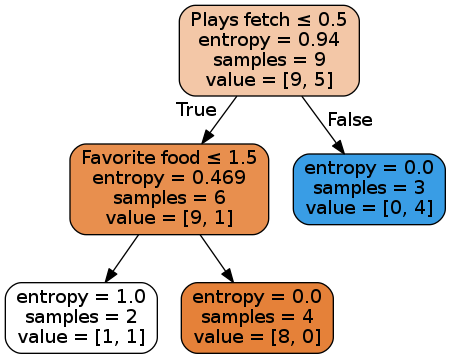